# 0 Utils

In [1]:
import os
import numpy as np
import seaborn as sb
%matplotlib inline
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

N_JOBS = 6

# 1 Load Dataset

In [2]:
personas = pd.read_csv('..\\..\\Datos\\working\\personas_cotizacion3.csv',encoding = "ISO-8859-1")
personas.head(2)



,Unnamed: 0,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_profesion,...,nro_proyectos,profesion,rut,sexo,tipo_cliente,Altos del Valle,Edificio Urban 1470,San Andres Del Valle,Edificio Mil610,Edificio Junge
0,0,True,True,True,False,True,True,True,False,True,...,2.0,Abogado,000.000.000-0,Femenino,Natural,0.0,1.0,1.0,0.0,0.0
1,3,True,True,True,True,False,True,True,True,True,...,1.0,Médico,10.000.522-0,Masculino,Natural,0.0,0.0,0.0,0.0,2.0


In [3]:
# Ready Data Set

print(personas.shape)
# print(personas.columns)
drop_columns = [personas.columns[0], 'rut', 'negocio', 'max_rango_edad']

p_negocio = personas.negocio
personas = personas.drop(drop_columns, axis=1)

print(personas.shape)
print(p_negocio.shape)

personas = pd.get_dummies(personas)

print(personas.shape)
# personas.describe()

(2251, 34)
(2251, 30)
(2251,)
(2251, 173)


# Libraries

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

# Check the Dataset

In [5]:
print("Tamaño Total: ",personas.shape)
print("Personas que hicieron Negocio: ",p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ",p_negocio[p_negocio == False].shape)

Tamaño Total:  (2251, 173)
Personas que hicieron Negocio:  (714,)
Personas que no Hicieorn Negocio:  (1537,)


# Train & Test

In [6]:
X = personas
y = p_negocio

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(1575, 173) (676, 173) (1575,) (676,)


# Help Functions

In [7]:
# Import necessary modules
def roc_curve_plot(model, X_test, y_test):
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, treshold = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [8]:
def plot_confusion_matrix(model,X,y,y_pred):
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5,5))
    sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Acc: {0}'.format(model.score(X, y))
    plt.title(all_sample_title, size = 10);
    plt.show()

In [9]:
def plot_importance_graph(model):
    features = personas.columns
    
    feature_importance = model.feature_importances_ 
    fig = plt.figure(figsize=(20, 18))
    ax = fig.add_subplot(111)

    df_f = pd.DataFrame(feature_importance, columns=["importance"])
    df_f["labels"] = features
    df_f.sort_values("importance", inplace=True, ascending=False)
    display(df_f.head(5))

    index = np.arange(len(feature_importance))
    bar_width = 0.5
    rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
    plt.yticks(index, df_f["labels"])
    plt.show()

In [10]:
def grid_results(grid):
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    best_model = grid.best_estimator_
    best_model.fit(X_train,y_train)
#     mse = mean_squared_error(y_test, best_model.predict(X_test))
#     print( 'MSE: '+ str(mse))
#     print( 'RMSE: '+  str(np.sqrt(mse)))
    
    print("Best score is {}".format(grid.best_score_))
    
    y_pred = best_model.predict(X_test)
    # Confusion Matrix
    print()
    plot_confusion_matrix(best_model, X_test, y_test, y_pred)

    #ROC Curve
    roc_curve_plot(best_model, X_test, y_test)

    # Grid Scores
#     print(grid.grid_scores_)

# LogisticRegression

LogisticRegression(C=3.727593720314938, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
          
          
          
LogisticRegression(C=3.727593720314938, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Best score is 0.8921410090556274

## LogisticRegression Unbalanced

(1575, 173) (676, 173) (1575,) (676,)
[[389  49]
 [ 76 162]]
             precision    recall  f1-score   support

      False       0.84      0.89      0.86       438
       True       0.77      0.68      0.72       238

avg / total       0.81      0.82      0.81       676



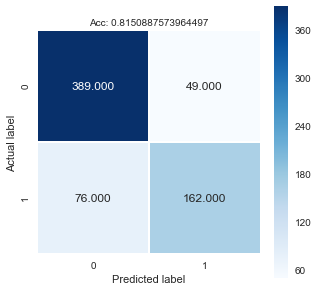

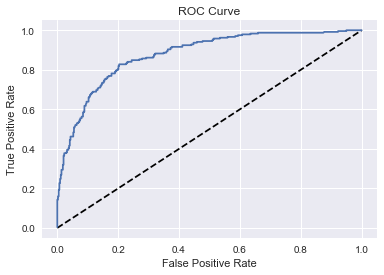

In [11]:
# Balanced Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

model = LogisticRegression(C=3.727593720314938, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, y_pred)

#ROC Curve
roc_curve_plot(model, X_test, y_test)

## LogisticRegression Balanced

(1575, 173) (676, 173) (1575,) (676,)
[[344  94]
 [ 44 194]]
             precision    recall  f1-score   support

      False       0.89      0.79      0.83       438
       True       0.67      0.82      0.74       238

avg / total       0.81      0.80      0.80       676



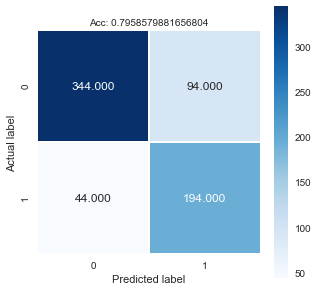

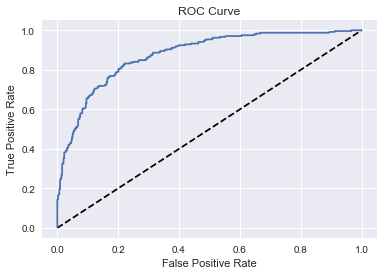

In [12]:
# Balanced Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

model = LogisticRegression(C=3.727593720314938, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, y_pred)

#ROC Curve
roc_curve_plot(model, X_test, y_test)

In [13]:
def my_recall(tp, fn):
    return tp / (tp + fn)

def my_precision(tp, fp):
    return tp / (tp + fp)

def my_specificity(tn, fp):
    return tn / (tn + fp)

def my_fpr(fp, tn):
    return fp / (tn + fp)

def my_accuracy(tp, fn, fp, tn):
    return (tp + tn) / (tp + fn + fp + tn)

def my_metrics(arr):
    tp = arr[0,0]
    fn = arr[0,1]
    fp = arr[1,0]
    tn = arr[1,1]
    return my_recall(tp, fn), my_precision(tp, fp), my_specificity(tn, fp), my_fpr(fp, tn), my_accuracy(tp, fn, fp, tn)

# my_metrics(values)

In [15]:
# Acumulativo
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model = LogisticRegression(C=3.727593720314938, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

cm, labels = [], []
rs, ps, ss, fprs, accs = [], [], [], [], []
tps, fns, fps, tns = [], [], [], []
predictors = pd.DataFrame()

for predictor in personas:
    labels.append(predictor)
    predictors[str(predictor)] = personas[predictor]
    X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size=0.3, random_state=0)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    tp, fn, fp, tn = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    tps.append(tp); fns.append(fn); fps.append(fp); tns.append(tn)
    r, p, s, fpr, acc = my_metrics(cm)
    rs.append(r); ps.append(p); ss.append(s); fprs.append(fpr); accs.append(acc)

In [16]:
results = pd.DataFrame()
results['recall (tpr)'] = rs
results['precision'] = ps
results['fpr'] = fprs
results['specificity'] = ss
results['accuracy'] = ss
results['tn'] = tns
results['tp'] = tps
results['fp'] = fps
results['fn'] = fns
results['attribute'] = labels

results.index = labels
results.head()

,recall (tpr),precision,fpr,specificity,accuracy,tn,tp,fp,fn,attribute
is_apellido1,1.000000,0.647929,1.000000,0.000000,0.000000,0,438,238,0,is_apellido1
is_appelido2,0.004566,1.000000,0.000000,1.000000,1.000000,238,2,0,436,is_appelido2
is_celular,0.006849,0.750000,0.004202,0.995798,0.995798,237,3,1,435,is_celular
is_direccion,0.771689,0.868895,0.214286,0.785714,0.785714,187,338,51,100,is_direccion
is_fnac,0.771689,0.868895,0.214286,0.785714,0.785714,187,338,51,100,is_fnac


C:\Users\joaquin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


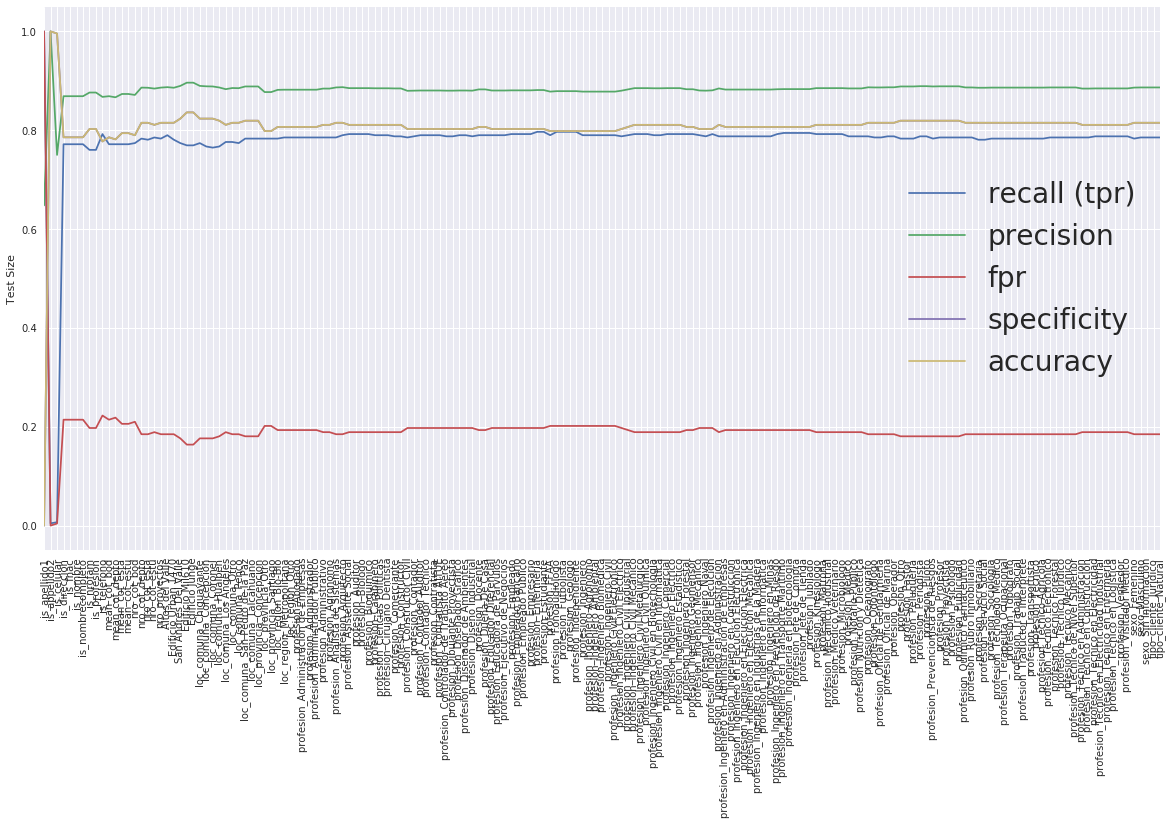

In [17]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 26}

plt.rc('font', **font)
# f = plt.figure(figsize=(60,30))
ax = results[['recall (tpr)', 'precision', 'fpr', 'specificity', 'accuracy']].plot(figsize=(20,10))
ax.legend(prop={'size': 28})
ax.set_ylabel('Test Size')
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')
plt.show()

C:\Users\joaquin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


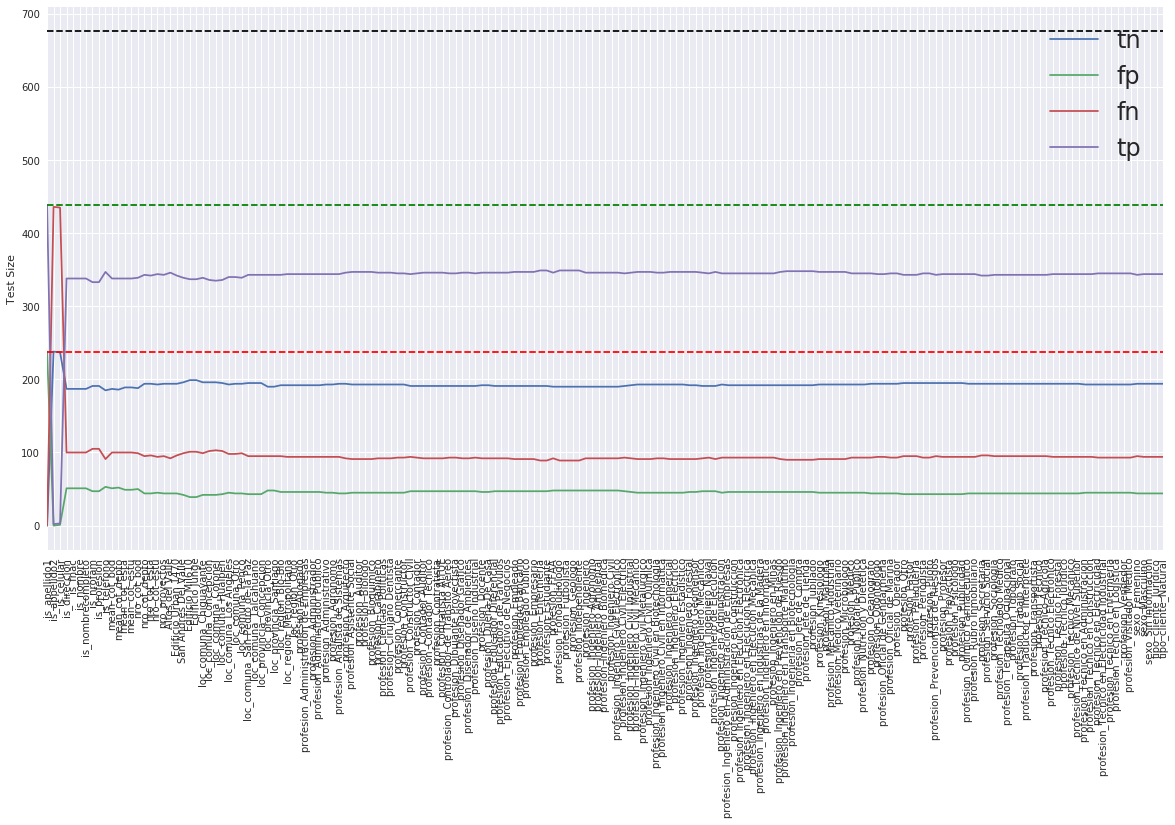

In [18]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 26}

# plt.style.use('classic')
plt.rc('font', **font)
f = plt.figure(figsize=(40,20))
ax = results[['tn', 'fp', 'fn', 'tp']].plot(figsize=(20,10))
ax.legend(prop={'size': 24})
ax.set_ylabel('Test Size')
ax.axhline(y_test[y_test == False].shape[0], color='green', linestyle='--')
ax.axhline(y_test[y_test == True].shape[0], color='red', linestyle='--')
ax.axhline(y_test.shape[0], color='black', linestyle='--')
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')
plt.show()

In [ ]:
personas['is_nombre'].reshape(personas['is_nombre'].shape[0],1).shape

In [21]:
# Independiente
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model = LogisticRegression(C=3.727593720314938, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

cm, labels = [], []
rs, ps, ss, fprs, accs = [], [], [], [], []
tps, fns, fps, tns = [], [], [], []
predictors = pd.DataFrame()

for predictor in personas:
    labels.append(predictor)
    predictors[str(predictor)] = personas[predictor]
    prd = personas[[predictor]]
#     print(prd.isnull().sum())
    
    X_train, X_test, y_train, y_test = train_test_split(prd, y, test_size=0.3, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    tp, fn, fp, tn = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    tps.append(tp); fns.append(fn); fps.append(fp); tns.append(tn)
    r, p, s, fpr, acc = my_metrics(cm)
    rs.append(r); ps.append(p); ss.append(s); fprs.append(fpr); accs.append(acc)

C:\Users\joaquin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """


In [22]:
results = pd.DataFrame()
results['recall (tpr)'] = rs
results['precision'] = ps
results['fpr'] = fprs
results['specificity'] = ss
results['accuracy'] = ss
results['tn'] = tns
results['tp'] = tps
results['fp'] = fps
results['fn'] = fns
results['attribute'] = labels

results.index = labels
results.head()

,recall (tpr),precision,fpr,specificity,accuracy,tn,tp,fp,fn,attribute
is_apellido1,1.000000,0.647929,1.000000,0.000000,0.000000,0,438,238,0,is_apellido1
is_appelido2,0.004566,1.000000,0.000000,1.000000,1.000000,238,2,0,436,is_appelido2
is_celular,0.002283,0.500000,0.004202,0.995798,0.995798,237,1,1,437,is_celular
is_direccion,0.771689,0.868895,0.214286,0.785714,0.785714,187,338,51,100,is_direccion
is_fnac,0.821918,0.798226,0.382353,0.617647,0.617647,147,360,91,78,is_fnac


C:\Users\joaquin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


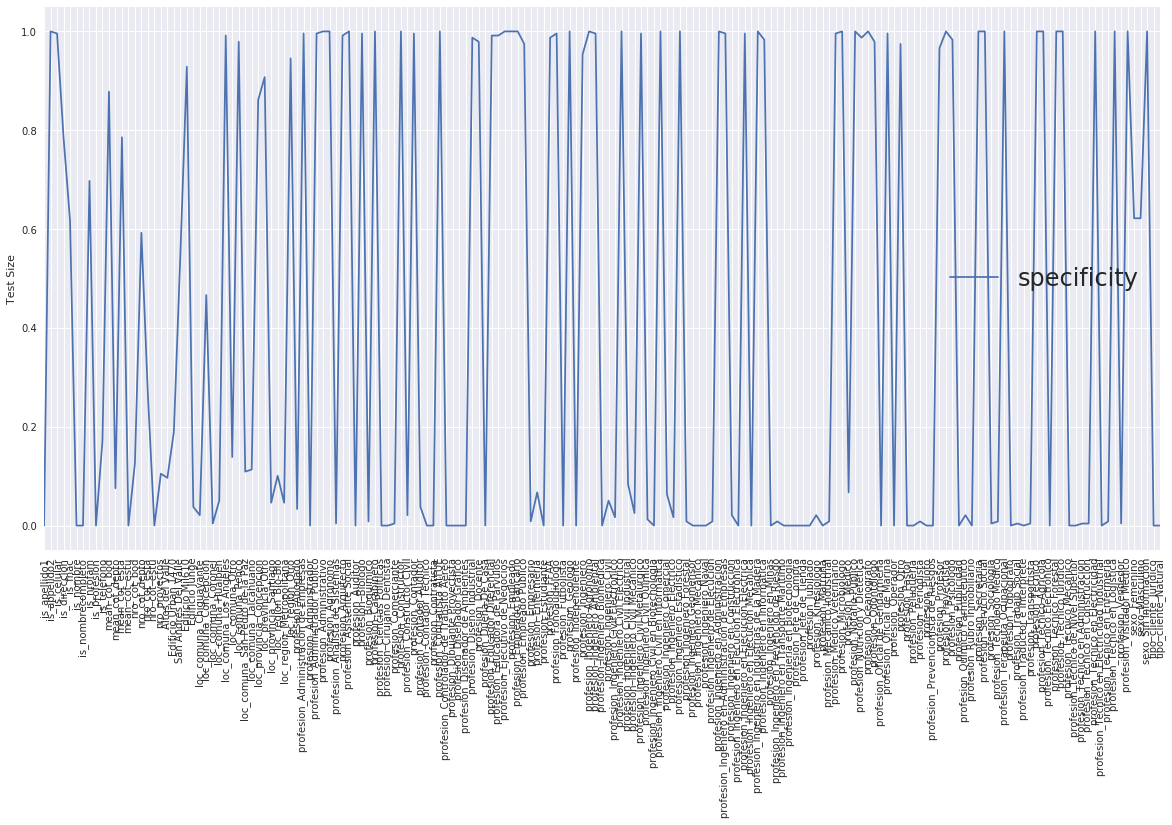

In [23]:
font = {'weight' : 'normal',
        'size'   : 26}

# plt.style.use('classic')
plt.rc('font', **font)
f = plt.figure(figsize=(40,20))
ax = results[['specificity']].plot(figsize=(20,10))
ax.legend(prop={'size': 24})
ax.set_ylabel('Test Size')
# ax.axhline(y_test[y_test == False].shape[0], color='green', linestyle='--')
# ax.axhline(y_test[y_test == True].shape[0], color='red', linestyle='--')
# ax.axhline(y_test.shape[0], color='black', linestyle='--')
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')
plt.show()

### 3.5.3 DecisionTree

Current Bests: 

class_weight = None:
TN -> 67:{'criterion': 'gini', 'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 8}

class_weight = 'balanced'
TN -> 71:{'criterion': 'gini', 'max_depth': 1, 'max_features': 7, 'min_samples_leaf': 6}


{'criterion': 'gini', 'max_depth': 9, 'max_features': 9, 'min_samples_leaf': 1}

TN -> 224 DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=26, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
            
            
TN - 242 DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=7, max_features=27, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
            
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=29, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
            
            
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=27, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


(1575, 173) (676, 173) (1575,) (676,)
[[380  87]
 [ 53 156]]
             precision    recall  f1-score   support

      False       0.88      0.81      0.84       467
       True       0.64      0.75      0.69       209

avg / total       0.80      0.79      0.80       676



C:\Users\joaquin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


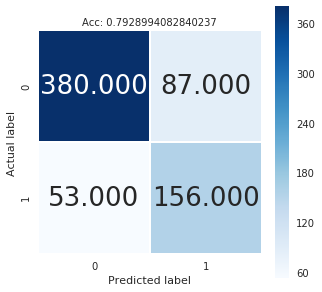

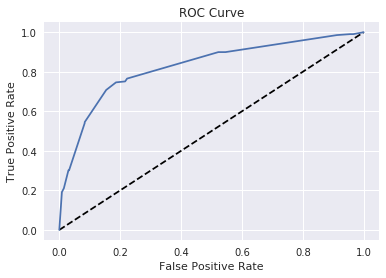

In [29]:
X = personas
y = p_negocio

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=27, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

plot_confusion_matrix(dtree, X_test, y_test, y_pred)

#ROC Curve
roc_curve_plot(dtree, X_test, y_test)


,importance,labels
15,0.581718,nro_cot_depto
4,0.222644,is_fnac
132,0.090586,profesion_Otro
11,0.029207,mean_cot_depto
7,0.015166,is_nrofam


C:\Users\joaquin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


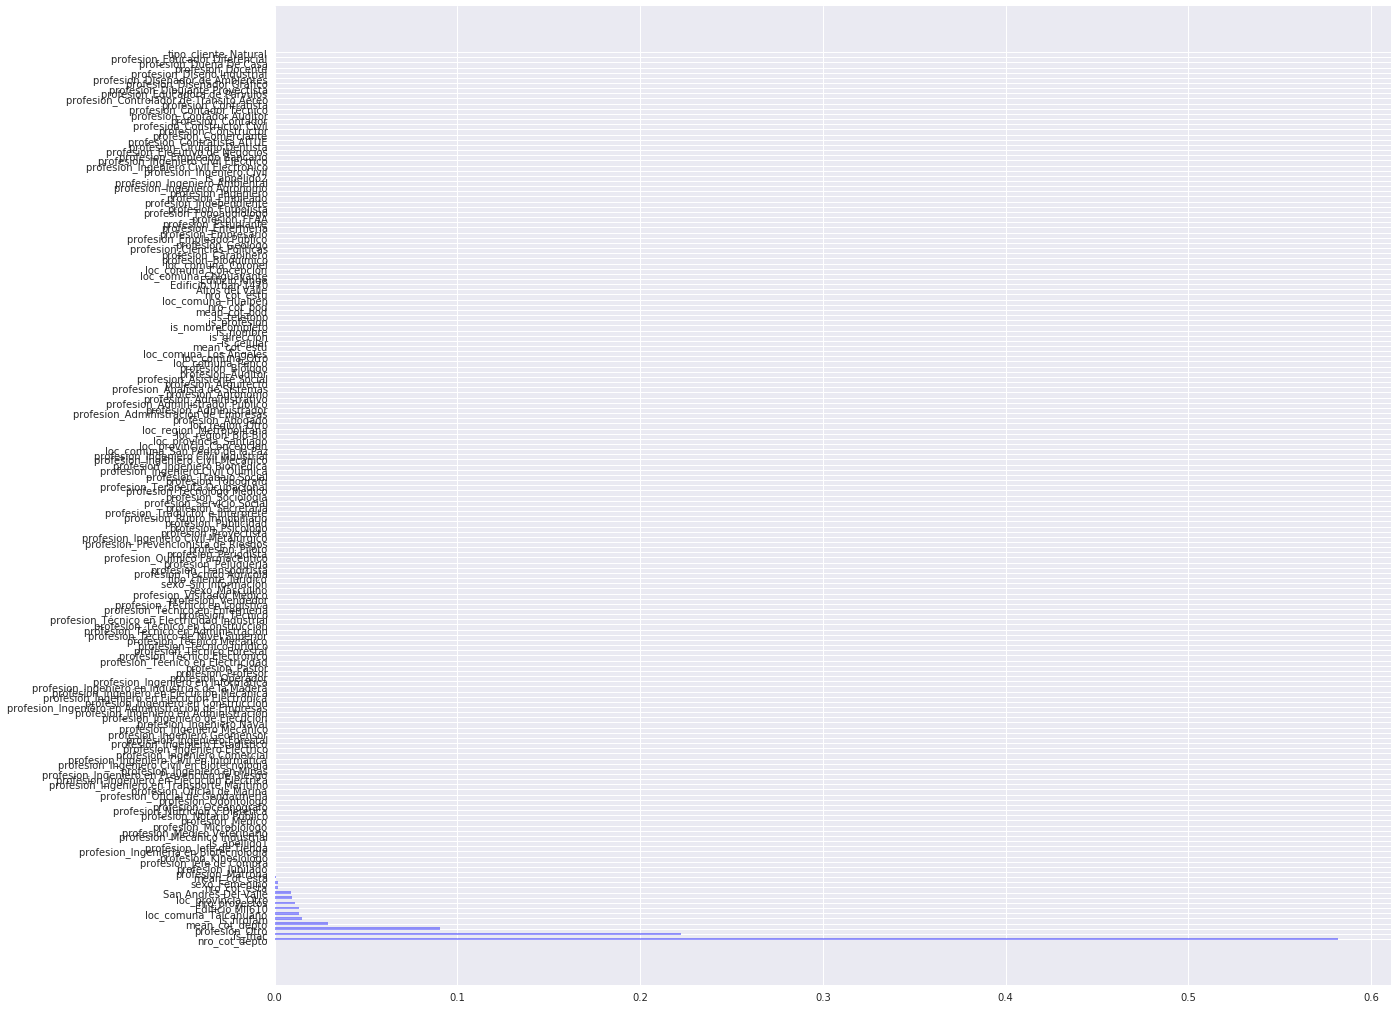

In [27]:
plot_importance_graph(dtree)

### 3.5.4 RandomForest